In [1]:
# import required librery
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Import dataset
dataset = pd.read_csv(r"C:\Users\USER\Downloads\Python\ML_project\KMeans Clustering\Customer_data.csv")
dataset.head(3)

,Customer_ID,Age,Avg_Spend_Time_Min,Visits_Per_Week,Promotion_Interest
0,CUST_001,39,50,1,7.6
1,CUST_002,33,53,0,8.1
2,CUST_003,41,61,7,6.7


In [3]:
dataset = dataset.iloc[:,1:]
dataset.head(3)

,Age,Avg_Spend_Time_Min,Visits_Per_Week,Promotion_Interest
0,39,50,1,7.6
1,33,53,0,8.1
2,41,61,7,6.7


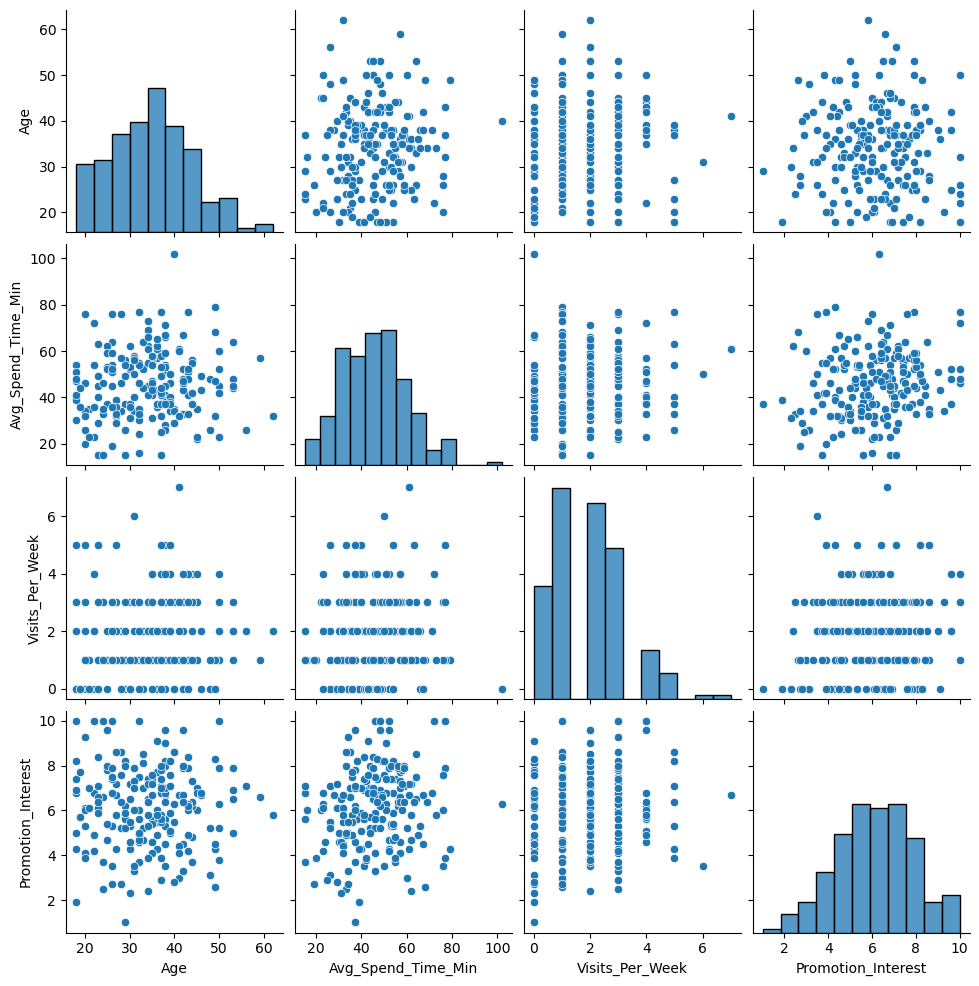

In [4]:
sns.pairplot(dataset)
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

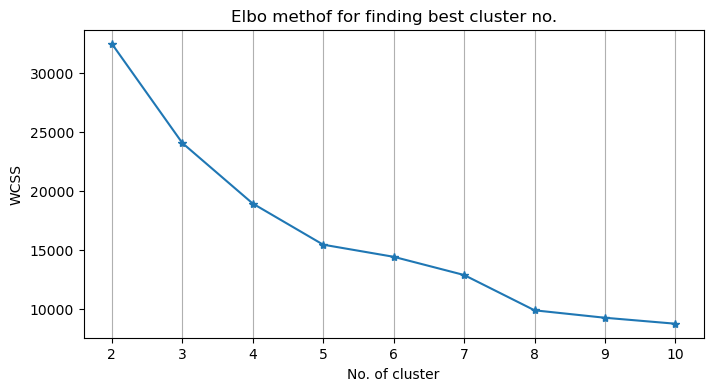

In [5]:
wcss = []
for i in range(2,11):
    km = KMeans(n_clusters=i, init='k-means++')
    km.fit(dataset)
    wcss.append(km.inertia_)
plt.figure(figsize=(8,4))
plt.plot([i for i in range(2,11)], wcss, marker='*')
plt.title('Elbo methof for finding best cluster no.')
plt.xticks(ticks=[i for i in range(2,11)])
plt.xlabel('No. of cluster')
plt.ylabel('WCSS')
plt.grid(axis='x')
plt.show()

In [6]:
kmeans = KMeans(n_clusters=3)
dataset['predict'] = kmeans.fit_predict(dataset)
cluster_name = {0:'Daily', 1:'Weekend', 2:'Promotion'}
dataset['predict'] = dataset['predict'].map(cluster_name)

dataset.head(5)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Age,Avg_Spend_Time_Min,Visits_Per_Week,Promotion_Interest,predict
0,39,50,1,7.6,Promotion
1,33,53,0,8.1,Weekend
2,41,61,7,6.7,Weekend
3,50,60,1,5.2,Weekend
4,32,24,2,4.6,Daily


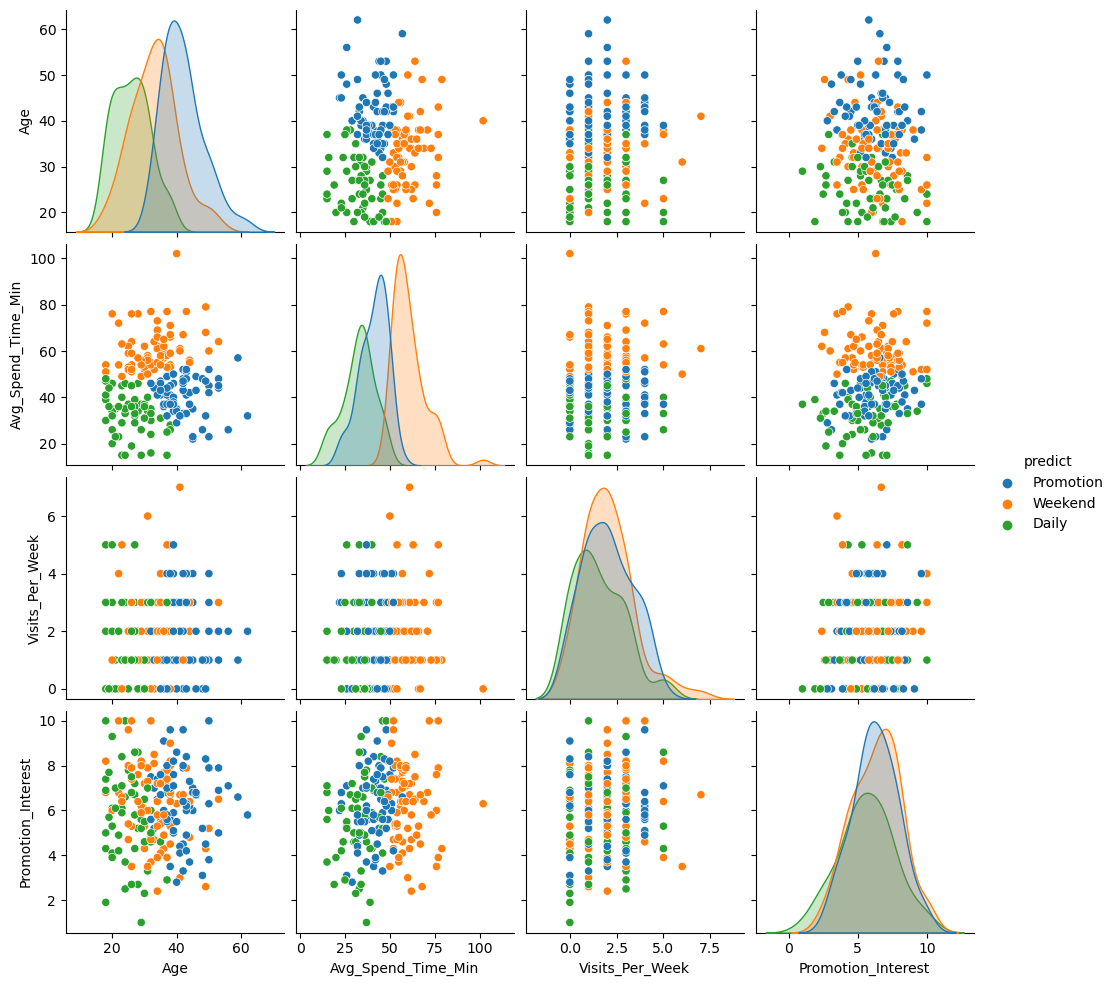

In [7]:
sns.pairplot(dataset, hue='predict')
plt.show()

In [8]:
silhouette_score(dataset.iloc[:,:-1],dataset['predict'])

0.3493608224239628

In [9]:
import pickle
pickle.dump(kmeans, open("kmeans.pkl",'wb'))

In [10]:
kmeans = pickle.load(open("kmeans.pkl",'rb'))

In [11]:
def clustering(Age, Avg_Spend_Time_Min, Visits_Per_Week, Promotion_Interest):
    new_customer = np.array([[Age, Avg_Spend_Time_Min, Visits_Per_Week, Promotion_Interest]])
    predicted_cluster = kmeans.predict(new_customer)

    if predicted_cluster[0] == 0:
        return "Daily"
    elif predicted_cluster[0] == 1:
        return "Weekend"
    else:
        return "Promotion"

Age = 40
Avg_Spend_Time_Min = 65
Visits_Per_Week = 4
Promotion_Interest = 8

predicted_result = clustering(Age, Avg_Spend_Time_Min, Visits_Per_Week, Promotion_Interest)
print("New Customer assign to cluster: ",predicted_result)


New Customer assign to cluster:  Weekend


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
